#  <font color='black'>Pandas library</font> 

PanDas es la abreviación de Panel Datas.

Su estructura nos permite la manipulación de datos además de contar con herramientas diseñadas para el data cleaning y el analysis rápido y sencillo en Python.

La principal diferencia entre Numpy y pandas es que pandas está diseñado para trabajar mejor con tablas de datos, mientras que Numpy está mejor optimizado para trabajar con datos numéricos.

# Índice

0. Load Pandas


1. Data Structures

    1.1 Series
    
    1.2 DataFrame
    
    1.3 Index Objects
    
    
2. Essential Functionality

    2.1 Reindex 
    
        2.1.1 Series
    
        2.1.2 DatFrame
    
    2.2 Drop entries
    
        2.2.1 Series
    
        2.2.2 DatFrame
        
    2.3 Selecting entries
    
        2.3.1 Series
    
        2.3.2 DatFrame
        
        2.3.3 Selecting with loc and iloc
        
    2.4 Data Aligment
    
        2.4.1 Series
        
        2.4.2 DataFrame
        
        2.4.3 Arithmetic methods
        
    2.5 Apply, Applymap & Map functions
    
        2.5.1 Apply
        
        2.5.2 Applymap
        
        2.5.3 Map
        
    2.6 Sorting
    
        2.6.1 Sort by index
        
        2.6.2 Sort by values
        
3. Summarrizing and Computing Descriptive Statistics

    3.1 Basic Statistic
    
    3.2 Correlation and Covariance
    
        3.2.1 Series
        
        3.2.2 DataFrame
        
        3.2.3 Plotting
        
    3.3 Unique Values, Value Counts and Membership (isin)
    
        3.3.1 unique Method
        
        3.3.2 value_counts Method
        
        3.3.3 isin Method
        
        
 

##  Load pandas (remember to pip install pandas first)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## 1. Data Structures

## 1.1 Series
Objeto similar a un array unidimensional capaz de almacenar datos de cualquier tipo que además tienen asignados unos index que son asignados automáticamente por pandas si no se especifica lo contrario.

In [2]:
obj = pd.Series([4,7,-5,3])

obj

0    4
1    7
2   -5
3    3
dtype: int64

Nos muestra el index a la izquierda y los valores a la derecha.

Si no especificamos ningún index a los datos, pandas asociará uno automáticamente desde el 0 al N-1 datos (N = número de datos)

#### index  labels
Podemos darle un nombre al index de cada dato:

In [3]:
obj2 = pd.Series([4,7,-5,3], index=["d", "b", "a", "c"])

obj2

d    4
b    7
a   -5
c    3
dtype: int64

Podemos llamar a todos los index de la Serie:

In [4]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Podemos asignar el index label de otra forma:

In [5]:
obj2.index = ["1.", "2.", "3.", "4."]

obj2

1.    4
2.    7
3.   -5
4.    3
dtype: int64

#### selecting index

In [6]:
obj2["1."]

4

#### series from dict

In [7]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}

obj3 = pd.Series(sdata)

obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Cuando pasamos un diccionario a series, el index es el key del diccionario en orden.

#### series to dict

In [8]:
dict3 = obj3.to_dict()

dict3

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

#### dict to series

In [9]:
dict3 = Series(dict3)

dict3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

#### name attribute
Podemos darle una descripción/ nombre a la serie y a sus index

In [10]:
obj3.name = "series description: population"

obj3.index.name = "index name: state"

obj3

index name: state
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: series description: population, dtype: int64

#### index order (orden de las filas)

Podemos escoger el orden de los index:

In [11]:
states = ["California", "Ohio", "Oregon", "Texas"]

obj4 = pd.Series(sdata, index=states)

obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

En caso de escribir un index que no tiene valores, el valor que aparecerá será el de NaN. Si algún dato se queda fuera de la lista, no aparecerá en nuestra nueva serie (Utah).

#### null values
Podemos encontrar qué valores son null o que valores no son null

In [12]:
# pandas function

pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [13]:
# instance method

obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

## 1.2 DataFrame

Estructuras bidimensionales. Tabla de datos de forma rectangular compuesta por una colección de columnas que guardan información de cualquier tipo (cada celda puede tener un dtype distinto).

Contiene index tanto filas como columnas (a diferencia de las Series, que sólo tienen index en las filas)

#### nested dict of dicts to dataframe
Si pasamos un nested dict a un DataFrame, pandas interpretará las outer keys como columnas y las inner keys como index

In [14]:
data0 = {"Nevada": {2001: 2.4, 2002: 2.9}, "Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6}}

frame0 = pd.DataFrame(data0)

frame0

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Podemos obtener los values del diccionario

In [15]:
frame0.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

Podemos obtener los keys del diccionario

In [16]:
frame0.keys()

Index(['Nevada', 'Ohio'], dtype='object')

#### dict to dataframe

La forma más común para crear un DataFrame es mediante un diccionario que contenga listas de la misma longitud (si no, no funcionará).

In [17]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
       "year": [2000,2001,2002,2001,2002,2003],
       "pop": [1.5,1.7,3.6,2.4,2.9,3.2]}

frame = pd.DataFrame(data)

frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### index label
Podemos darle un nombre a los index

In [18]:
pd.DataFrame(data, index = ["One", "Two", "Three", "Four", "Five", "Six"])

,state,year,pop
One,Ohio,2000,1.5
Two,Ohio,2001,1.7
Three,Ohio,2002,3.6
Four,Nevada,2001,2.4
Five,Nevada,2002,2.9
Six,Nevada,2003,3.2


#### head()
Muestra las cinco primeras filas

In [19]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


#### tail()
Muestra las últimas cinco filas

In [20]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### columns order
Si especificamos una secuencia de columnas, las columnas aparecerán en el orden especificado

In [21]:
pd.DataFrame(data, columns = ["year", "state", "pop"])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Si especificamos una columna que no exista en el diccionario, obtendremos un NaN value

In [22]:
frame2 = pd.DataFrame(data, columns = ["year", "state", "pop", "debt"],
                      index = ["one", "two", "three", "four", "five", "six"])

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


#### column select
Podemos seleccionar una columna en concreto en forma de Series

In [23]:
frame2["state"]

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [24]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

#### columns value 
Podemos modificar el valor de las columnas

In [25]:
frame2["debt"] = 16.5

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [26]:
frame2["debt"] = np.arange(6)

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


#### new column
Podemoms crear nuevas columnas

In [27]:
frame2["credit"] = "test"

frame2

,year,state,pop,debt,credit
one,2000,Ohio,1.5,0,test
two,2001,Ohio,1.7,1,test
three,2002,Ohio,3.6,2,test
four,2001,Nevada,2.4,3,test
five,2002,Nevada,2.9,4,test
six,2003,Nevada,3.2,5,test


#### change column values
Podemos crear una serie con los valores e index deseados y luego asignarlo a la columna que queramos modificar

In [28]:
val = pd.Series([-1.2,-1.5,-1.7], index = ["two", "four", "five"])

frame2["debt"] = val

frame2

,year,state,pop,debt,credit
one,2000,Ohio,1.5,NaN,test
two,2001,Ohio,1.7,-1.2,test
three,2002,Ohio,3.6,NaN,test
four,2001,Nevada,2.4,-1.5,test
five,2002,Nevada,2.9,-1.7,test
six,2003,Nevada,3.2,NaN,test


Como sólo queríamos modificar ciertos index, los index no especificados se convierten en NaN 

#### row select
También podemos seleccionar filas (devuelve una Serie)

In [29]:
frame2.loc["three"]

year      2002
state     Ohio
pop        3.6
debt       NaN
credit    test
Name: three, dtype: object

#### del
Podemos eliminar columnas

In [30]:
del frame2["credit"]

frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


## 1.3 Index Objects


In [31]:
my_ser = Series([1,2,3,4], index = ["A", "B", "C", "D"])

my_ser

A    1
B    2
C    3
D    4
dtype: int64

#### index list

In [32]:
my_ser.index

Index(['A', 'B', 'C', 'D'], dtype='object')

#### column selection

In [33]:
my_ser[2]

3

#### index selection

In [34]:
my_index = my_ser.index

my_index[2]

'C'

In [35]:
my_index[2:]

Index(['C', 'D'], dtype='object')

#### inmutability
No podemos cambiar el label del index

my_index[2] = "Z" ---> TypeError

#### duplicated index
Pueden haber index duplicados. Si seleccionamos un index con duplicados, nos devolverá todos los index con ese nombre

In [36]:
dup_labels = pd.Index(["foo", "foo","bar","bar"])

dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

#### some index methods and properties

In [37]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.gyazo.com/a589e761f1b18746c2bf5e541eb77176.png", width = 600)

## 2. Essential Functionality
Mecanismos fundamentales para interactuar con los datos contenidos tanto en Series como en DataFrames

## 2.1 Reindexing
Podemos crear un nuevo objeto con los datos de otro dataframe pero con otros index nuevos o cambiados de orden.

### 2.1.1 Series

In [38]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])

obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [39]:
obj2 = obj.reindex(["a", "b", "c", "d"])

obj2

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [40]:
obj21 = obj2.reindex(["a", "b", "c", "d", "e"])

obj21

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Si damos index que no existen en el DataFrame original, aparecerá NaN

Podemos rellenar los index nuevos con diversos métodos

#### fill_value method
Nos sirve para rellenar valores en un dataframe

In [41]:
obj22 = obj2.reindex(["a", "b", "c", "d", "e"], fill_value = 0)

obj22

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

#### ffill method
Nos sirve para rellenar valores en un dataframe con los valores de otro

In [42]:
obj3 = pd.Series(["blue", "purple", "yellow"], index = [0,2,4])

obj3

0      blue
2    purple
4    yellow
dtype: object

In [43]:
obj3.reindex(range(6), method = "ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

### 2.1.2 DataFrames
Reindex puede modificar tanto el index (fila) como la columna o ambas.

In [47]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index = ["a","c","d"], 
                     columns = ["Ohio", "Texas", "California"])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


#### rows reindex

In [48]:
frame2 = frame.reindex(["a", "b", "c", "d"])

frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


#### columns reindex

In [49]:
states = ["Texas", "Utah", "California"]

frame3 = frame.reindex(columns = states)

frame3

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


#### rows and columns reindex 

In [55]:
frame4 = frame.reindex(["a", "b", "c", "d"], columns = states)

frame4

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


## 2.2 Drop Entries
drop method nos permite eliminar datos que no queramos; nos devuelve un nuevo objeto sin los valores

### 2.2.1 Series

In [56]:
obj = pd.Series(np.arange(5.), index = ["a", "b", "c", "d", "e"])

obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

#### Eliminar 1 dato

In [58]:
new_obj = obj.drop("c")

new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

#### Eliminar 2 o más datos

In [61]:
obj.drop(["d", "c"])

a    0.0
b    1.0
e    4.0
dtype: float64

### 2.2.2 DataFrame

In [62]:
data = pd.DataFrame(np.arange(16).reshape((4,4)), index = ["Ohio", "Colorado", "Utah", "New York"],
                   columns = ["one", "two", "three", "four"])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### dropping rows
Podemos eliminar una o varias filas seleccionando las row labels (axis = 0)

In [68]:
data.drop("Colorado")

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
New York,12,13,14,15


In [67]:
data.drop("Colorado", axis = 0)

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
New York,12,13,14,15


In [63]:
data.drop(["Colorado", "Ohio"])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


#### dropping columns
Podemos eliminar una o varias columnas seleccionando el column label y pasando axis = 1 o axis = "columns"

In [64]:
data.drop("two", axis = 1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [66]:
data.drop(["two", "four"], axis = "columns")

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


## 2.3 Selecting entries
Podemos seleccionar datos en concreto

### 2.3.1 Series

In [69]:
obj = pd.Series(np.arange(4.), index = ["a", "b", "c", "d"])

obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

#### Selecting by index label

In [70]:
obj["b"]

1.0

In [73]:
obj[["b", "a", "d"]]

b    1.0
a    0.0
d    3.0
dtype: float64

In [76]:
obj["b":"c"]

b    1.0
c    2.0
dtype: float64

#### Selecting by index position

In [71]:
obj[1]

1.0

In [72]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [74]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [75]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

#### Changing values

In [78]:
obj["b":"c"] = 5

obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [79]:
obj[2:4] = 3

obj

a    0.0
b    5.0
c    3.0
d    3.0
dtype: float64

### 2.3.2 DataFrame

In [81]:
data = pd.DataFrame(np.arange(16).reshape((4,4)), index = ["Ohio", "Colorado", "Utah", "New York"],
                   columns = ["one", "two", "three", "four"])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### selecting columns

In [82]:
data["two"]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [83]:
data[["three", "one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


#### selecting by index position

In [86]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [87]:
data[data["three"] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Changing values

In [89]:
data[data < 5] = 0

data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [91]:
data["one"] = "e"

data

,one,two,three,four
Ohio,e,0,0,0
Colorado,e,5,6,7
Utah,e,9,10,11
New York,e,13,14,15


### 2.3.3 Selection with loc and iloc
Sólo para DataFrames. loc e iloc nos permiten seleccionar un grupo de filas y columnas de un dataframe (datos en concreto)

In [92]:
data = pd.DataFrame(np.arange(16).reshape((4,4)), index = ["Ohio", "Colorado", "Utah", "New York"],
                   columns = ["one", "two", "three", "four"])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### loc
Usando los axis labels

In [93]:
data.loc["Colorado", ["two", "three"]]

two      5
three    6
Name: Colorado, dtype: int32

In [101]:
data.loc["Colorado"]

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [95]:
data.loc["Colorado", ["two"]]

two    5
Name: Colorado, dtype: int32

In [96]:
data.loc["Colorado", "two"]

5

Podemos hacer slicing:

In [97]:
data.loc[:"Utah", "two"]

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

#### iloc 
Usando integers para la posición

In [99]:
data.iloc[1,[1,2]]

two      5
three    6
Name: Colorado, dtype: int32

In [100]:
data.iloc[1]

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [102]:
data.iloc[1,[1]]

two    5
Name: Colorado, dtype: int32

In [103]:
data.iloc[1,1]

5

In [104]:
data.iloc[[1,2], [3,0,1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


Podemos hacer slicing:

In [105]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [108]:
Image(url= "https://i.gyazo.com/36123b92ef5daeacf0457f8d0bd9738a.png", width = 600)

In [107]:
Image(url= "https://i.gyazo.com/b904138abc2ff08d36e7d2ec6f3d2107.png", width = 600)

### 2.4 Data Aligment
Ayuda a que los DataFrames tengan el mismo número de filas, columnas e index parejos para operar correctamente con ellos. Si cuando juntamos objetos los index labels no son los mismos, el index del nuevo objeto será la union de los index parejos y aparecerá NaN para los que no lo son

### 2.4.1 Series

In [109]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [110]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [111]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [112]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Esto puede suponer un problema, ya que los NaN pueden propagarse por todo el DataFrame a medida que trabajamos con ello

### 2.4.2 DataFrame

In [113]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])

df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [114]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [115]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [116]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


### 2.4.3 Arithmetic methods
En las operaciones aritméticas entre objetos con diferentes index podemos rellenar con un valor especial, como el 0, cuando un axis label (index label) está en un objeto pero no en otro

#### fill_value = 0

In [117]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [118]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [119]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [120]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Por ejemplo, si queremos sumar e igualar a 0 los datos no comunes entre axis labels:

In [121]:
df1.add(df2, fill_value = 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [125]:
Image(url= "https://i.gyazo.com/858dfc08cbe22f4ad714a3bd0885f538.png", width = 400)

### 2.5 Apply, Applymap & Map functions

In [128]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), 
                            index=['Utah', 'Ohio', 'Texas', 'Oregon'])

frame

,b,d,e
Utah,0.839449,1.761844,2.055335
Ohio,2.073073,1.636847,-1.364376
Texas,-0.127650,0.326779,-0.008783
Oregon,0.254106,-0.345907,0.657691


###  2.5.1 Apply
Podemos utilizar una o varias funciones en toda una fila/s y/o coluna/s.

In [129]:
f = lambda x: x.max() - x.min()

#### columns
El apply se ejecuta para cada fila en todas las columnas

In [130]:
frame.apply(f)

b    2.200723
d    2.107751
e    3.419711
dtype: float64

In [140]:
frame.apply(f)[[0]]

b    2.200723
dtype: float64

In [141]:
frame.apply(f)[0]

2.200722881544091

#### rows
El apply se ejecuta para cada columna en todas las filas

In [136]:
frame.apply(f, axis = "columns")

Utah      1.215886
Ohio      3.437449
Texas     0.454428
Oregon    1.003597
dtype: float64

In [138]:
frame.apply(f, axis = "columns")[[0]]

Utah    1.215886
dtype: float64

In [139]:
frame.apply(f, axis = "columns")[0]

1.2158864342222393

### 2.5.2 Applymap
Podemos utilizar los element-wise functions de Python. Se utiliza para modificar los datos del DataFrame

In [142]:
format = lambda x: "%.2f" %x

In [144]:
frame

,b,d,e
Utah,0.839449,1.761844,2.055335
Ohio,2.073073,1.636847,-1.364376
Texas,-0.127650,0.326779,-0.008783
Oregon,0.254106,-0.345907,0.657691


In [145]:
frame.applymap(format)

,b,d,e
Utah,0.84,1.76,2.06
Ohio,2.07,1.64,-1.36
Texas,-0.13,0.33,-0.01
Oregon,0.25,-0.35,0.66


### 2.5.3 Map
Como el applymap pero para una sola columna, es decir, en forma de series

In [147]:
frame["e"]

Utah      2.055335
Ohio     -1.364376
Texas    -0.008783
Oregon    0.657691
Name: e, dtype: float64

In [149]:
frame["e"].map(format)

Utah       2.06
Ohio      -1.36
Texas     -0.01
Oregon     0.66
Name: e, dtype: object

La diferencia entre Apply y Map es que:
    
    Apply: aplica la función para todo el DataFrame
    
    Map: aplica la función para una columna en concreto, es decir, una Serie

## 2.6 Sorting
Podemos ordenar los datos de diversas formas

### 2.6.1 Sort by index
sort_index nos permite ordenar los index labels por orden alfabético

#### Series

In [151]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

obj

d    0
a    1
b    2
c    3
dtype: int64

In [152]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

#### DataFrames

In [153]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])

frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [154]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


axis = 0 por defecto, pero podemos seleccionar sort por columnas mediante axis = 1

In [155]:
frame.sort_index(axis =1 )

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Por defecto, los datos se ordenan en orden ascendente. Podemos cambiarlo mediante ascending = False

In [156]:
frame.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


### 2.6.2 Sort by values
sort_values nos permite ordenar los datos por valores. Los NaN van abajo del todo por defecto

#### Series

In [157]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [158]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

#### DataFrame

In [159]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [162]:
frame.sort_values(by="b")

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [163]:
frame.sort_values(by= ["a", "b"])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


## 3. Summarrizing and Computing Descriptive Statistics

## 3.1 Basic Statistic

In [164]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], 
                  index=['a', 'b', 'c', 'd'], columns=['one', 'two'])

df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


#### sum

Podemos sumar columnas, es decir, la suma se realiza entre filas:

In [165]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Podemos sumar filas, es decir, la suma se realiza a través de las columnas

In [167]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [168]:
df.sum(axis="columns")

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Podemos contemplar los NaN values, ya que por defecto, se hacen 0

In [169]:
df.sum(axis="columns", skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

#### others

In [170]:
df.idxmax()

one    b
two    d
dtype: object

In [174]:
df.max()

one    7.1
two   -1.3
dtype: float64

In [171]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


#### describe
Si los datos no son numéricos, se obtienen otros resultados de la estadística descriptiva

In [172]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [176]:
Image(url= "https://i.gyazo.com/e4bb706014d55470ec6771e321fb76d3.png", width = 600)

## 3.2 Correlation and Covariance
Algunas recopilaciones estadísticas se forman a partir de dos argumentos

In [225]:
##### EXPLICAR que es la correlacition y la covariance

#### Data 

Vamos a importar un DataFrame desde una página web, por lo que necesitamos instalar los módulos pertinentes:

conda install pandas-datareader

In [177]:
import pandas_datareader.data as web

In [199]:
# No especificamos el datetime y con diccionarios

all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})

volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

In [201]:
# Otra forma, especificando el datetime y sin diccionarios

import datetime
from pandas_datareader import data

ticker_list = ["AAPL", "IBM", "MSFT", "GOOG"]

prices = web.get_data_yahoo(ticker_list, start = datetime.datetime(2015,12,2), end = datetime.datetime(2020,11,1))["Adj Close"]

volumes = data.get_data_yahoo(ticker_list, start = datetime.datetime(2015,12,2), end = datetime.datetime(2020,11,1))["Volume"]

In [202]:
prices.head()

Symbols,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-12-02,26.713804,111.307220,50.380878,762.380005
2015-12-03,26.465693,110.685745,49.459229,752.539978
2015-12-04,27.345581,111.888832,51.019650,766.809998
2015-12-07,27.173285,111.187714,50.928402,763.250000
2015-12-08,27.161795,109.992599,50.910156,762.369995


In [196]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-12-02,26.713804,111.307220,50.380878,762.380005
2015-12-03,26.465693,110.685745,49.459229,752.539978
2015-12-04,27.345581,111.888832,51.019650,766.809998
2015-12-07,27.173285,111.187714,50.928402,763.250000
2015-12-08,27.161795,109.992599,50.910156,762.369995


Calculamos el cambio porcentual de los precios

In [203]:
returns = price.pct_change()

returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-11-23,-0.029743,0.026937,-0.001331,-0.004207
2020-11-24,0.011594,0.036056,0.017848,0.019610
2020-11-25,0.007467,-0.001768,0.000047,0.001442
2020-11-27,0.004826,0.001208,0.006359,0.012284
2020-11-30,0.033279,-0.005870,-0.011360,-0.015715


### 3.2.1 Series
Valores concretos

#### Covarianza

In [204]:
returns["MSFT"].cov(returns["IBM"])

0.0001601421810260386

#### Correlación

In [205]:
returns["MSFT"].cov(returns["IBM"])

0.0001601421810260386

In [207]:
returns.MSFT.corr(returns.IBM)

0.5610213162192411

### 3.2.2 DataFrames
Todos los valores

#### Covarianza

In [208]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000361,0.000147,0.000239,0.000208
IBM,0.000147,0.000265,0.000160,0.000141
MSFT,0.000239,0.000160,0.000308,0.000228
GOOG,0.000208,0.000141,0.000228,0.000277


#### Correlación

In [209]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.475285,0.717274,0.656762
IBM,0.475285,1.000000,0.561021,0.522053
MSFT,0.717274,0.561021,1.000000,0.781532
GOOG,0.656762,0.522053,0.781532,1.000000


#### corrwith method
Nos permite calcular la correlación respecto a un valor específico

In [210]:
returns.corrwith(returns.IBM)

AAPL    0.475285
IBM     1.000000
MSFT    0.561021
GOOG    0.522053
dtype: float64

### 3.2.3 Plotting 
Es interesante graficar los datos, así como la correlación

#### matplotlib

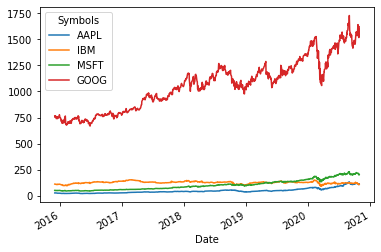

In [216]:
import matplotlib.pyplot as plt

prices.plot()
plt.show()

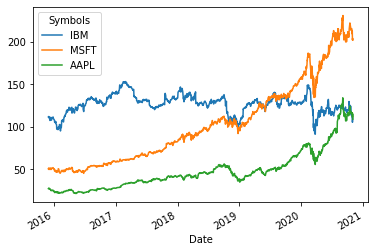

In [218]:
prices[["IBM", "MSFT", "AAPL"]].plot()
plt.show()

#### seaborn

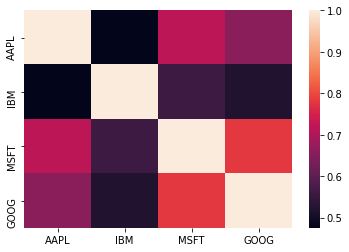

In [224]:
import seaborn as sns

corr = returns.corr()

sns.heatmap(corr,annot=False)
plt.show()

## 3.3 Unique Values, Value Counts and Membership (isin)
Otra forma de extraer información relevante de los datos.

### 3.3.1 unique Method
Nos devuelve un array con todos los valores únicos

In [226]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [227]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

### 3.3.2 value_counts Method
Nos devuelve una serie que cuenta la frecuencia con la que se repite cada label index, en orden alfabético

In [243]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

Si queremos quitar el orden alfabético (patético):

In [244]:
obj.value_counts(sort = False)

b    2
c    3
a    3
d    1
dtype: int64

Podemos escribirlo como una secuencia o array, ya que es en top-level pandas method:

In [247]:
pd.value_counts(obj.values, sort = False)

b    2
c    3
a    3
d    1
dtype: int64

### 3.3.3 isin Method 
Permite filtrar un dataset, es decir, comprobar si un valor se encuentra en el dataset o fila o columna seleccionados

In [248]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

Buscamos si se encuentran los valores seleccionados. Nos devuelve en forma de booleana

In [252]:
mask = obj.isin(["b", "c"])

mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

Podemos ver los valores de las booleanas True:

In [253]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [254]:
Image(url= "https://i.gyazo.com/914362f9ba70ab176a9bd1e736061f14.png", width = 600)